In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import os
cachedir = 'data/cache/feature_corel.csv'
if not os.path.exists(cachedir):
    mus_nodes = pd.read_csv('./data/musician-graph/us_nodes.csv')
    # mus_edges = pd.read_csv('./data/musician-graph/edges.csv')
    # lab_nodes = pd.read_csv('./data/label-graph/nodes.csv')
    # lab_edges = pd.read_csv('./data/label-graph/edges.csv')

    mus_G = nx.read_gml('data/musician-graph/test.gml')
    
    mus_nodes['network_rank'] = mus_nodes.name.map(nx.get_node_attributes(mus_G,'eigenvector'))
    mus_nodes = mus_nodes[(~mus_nodes.followers.isnull()) & (~mus_nodes.popularity.isnull())]
    mus_nodes.to_csv(cachedir,index=False)
    # lab_G = nx.read_gml('data/label-graph/test.gml')
else:
    mus_nodes = pd.read_csv(cachedir)
print('read in data')

read in data


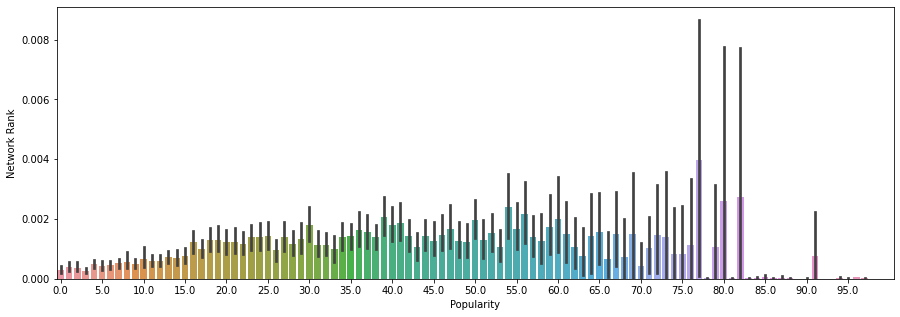

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
fig = sns.barplot(data=mus_nodes,x='popularity',y='network_rank')
fig.set(xlabel='Popularity',ylabel='Network Rank',xticks=np.arange(0,100,5))

fig.get_figure().savefig('pics/features/pop_networkrank.png',dpi=300)

### Quick glance at upper mid popularity 

<AxesSubplot:xlabel='popularity', ylabel='network_rank'>

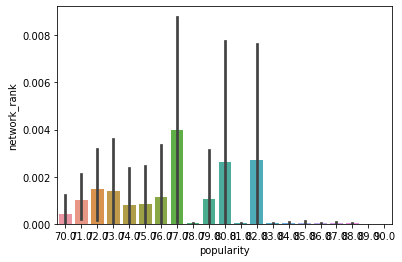

In [67]:
uppermid = mus_nodes[(mus_nodes.popularity >= 70) & (mus_nodes.popularity <= 90)]

sns.barplot(data =uppermid,x='popularity',y='network_rank')

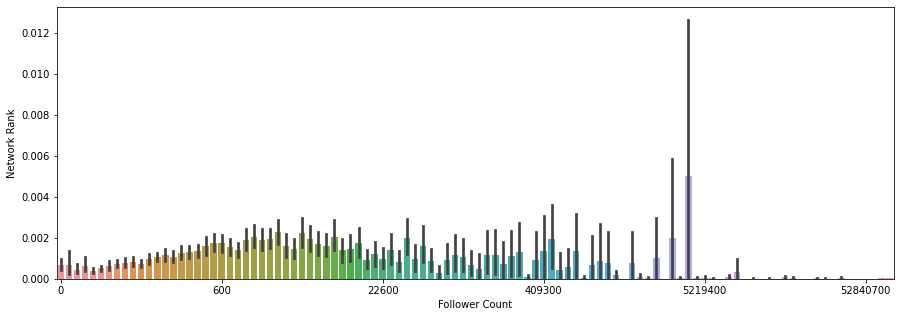

In [57]:
plt.figure(figsize=(15,5))

# gotta make separate bins for mus_nodes

mus_nodes['fol_logsqr'] = mus_nodes.followers.replace({0:1}).apply(lambda x: int(np.log(x)**1.6))

ticks = [int(np.exp(np.power(i,1/1.6)))//100 * 100 for i in np.arange(0,mus_nodes.fol_logsqr.max())]

fig = sns.barplot(data=mus_nodes,x='fol_logsqr',y='network_rank')
fig.set(xlabel='Follower Count',ylabel='Network Rank',
        # xscale='log'
        xticklabels=ticks,
        xticks=np.arange(0,mus_nodes.fol_logsqr.max(),20)
        )


fig.get_figure().savefig('pics/features/fol_networkrank.png',dpi=300)